<a href="https://colab.research.google.com/github/MJ416-datascientists/Data-Science-Project-/blob/main/s%26p500_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step 1: Install and Import Libraries**

In [1]:
!pip install yfinance pandas numpy matplotlib
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# **Step 2: Download Historical Data**

Download daily S&P 500 data from Yahoo Finance (2010–2024):

In [2]:
# Download S&P 500 (^GSPC) data
data = yf.download('^GSPC', start='2010-01-01', end='2024-12-31')

# Display the first few rows
print(data.head())


/tmp/ipython-input-1024837413.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('^GSPC', start='2010-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2010-01-04  1132.989990  1133.869995  1116.560059  1116.560059  3991400000
2010-01-05  1136.520020  1136.630005  1129.660034  1132.660034  2491020000
2010-01-06  1137.140015  1139.189941  1133.949951  1135.709961  4972660000
2010-01-07  1141.689941  1142.459961  1131.319946  1136.270020  5270680000
2010-01-08  1144.979980  1145.390015  1136.219971  1140.520020  4389590000


In [3]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2010-01-04,1132.989990,1133.869995,1116.560059,1116.560059,3991400000
2010-01-05,1136.520020,1136.630005,1129.660034,1132.660034,2491020000
2010-01-06,1137.140015,1139.189941,1133.949951,1135.709961,4972660000
2010-01-07,1141.689941,1142.459961,1131.319946,1136.270020,5270680000
2010-01-08,1144.979980,1145.390015,1136.219971,1140.520020,4389590000


In [ ]:
data.columns

MultiIndex([( 'Close', '^GSPC'),
            (  'High', '^GSPC'),
            (   'Low', '^GSPC'),
            (  'Open', '^GSPC'),
            ('Volume', '^GSPC')],
           names=['Price', 'Ticker'])

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3773 entries, 2010-01-04 to 2024-12-30
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, ^GSPC)   3773 non-null   float64
 1   (High, ^GSPC)    3773 non-null   float64
 2   (Low, ^GSPC)     3773 non-null   float64
 3   (Open, ^GSPC)    3773 non-null   float64
 4   (Volume, ^GSPC)  3773 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 176.9 KB


In [5]:
data.describe()

Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
count,3773.000000,3773.000000,3773.000000,3773.000000,3.773000e+03
mean,2727.439112,2741.379794,2711.377890,2726.890928,3.938928e+09
std,1264.115621,1270.407956,1257.309511,1264.040211,9.514030e+08
min,1022.580017,1032.949951,1010.909973,1027.650024,0.000000e+00
25%,1701.839966,1707.630005,1693.290039,1699.859985,3.374490e+09
50%,2431.770020,2441.399902,2419.969971,2431.919922,3.784360e+09
75%,3818.800049,3843.669922,3789.540039,3816.219971,4.301060e+09
max,6090.270020,6099.970215,6079.979980,6089.029785,1.061781e+10


In [ ]:
data.to_csv('sp500_data.csv')

# **Step 3: Feature Engineering**

Create log returns, rolling averages, and the target (volatility).

In [6]:
# Calculate daily log returns
data['LogReturn'] = np.log(data['Close'] / data['Close'].shift(1))

# Rolling statistics
data['MA_5'] = data['Close'].rolling(window=5).mean()
data['MA_20'] = data['Close'].rolling(window=20).mean()
data['Volume_MA_5'] = data['Volume'].rolling(window=5).mean()

# Realized volatility as target (standard deviation of log returns over 10 days)
data['RealizedVolatility'] = data['LogReturn'].rolling(window=10).std()

# Drop missing rows
data = data.dropna()

data.head()

Price,Close,High,Low,Open,Volume,LogReturn,MA_5,MA_20,Volume_MA_5,RealizedVolatility
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,,,,,
Date,,,,,,,,,,
2010-02-01,1089.189941,1089.380005,1073.890015,1073.890015,4077610000,0.014165,1087.452002,1121.862000,4.998778e+09,0.012735
2010-02-02,1103.319946,1104.729980,1087.959961,1090.050049,4749540000,0.012890,1089.681982,1120.378497,5.002304e+09,0.012804
2010-02-03,1097.280029,1102.719971,1093.969971,1100.670044,4285450000,-0.005489,1089.637988,1118.416498,4.795570e+09,0.012616
2010-02-04,1063.109985,1097.250000,1062.780029,1097.250000,5859690000,-0.031636,1085.353979,1114.714996,4.877028e+09,0.014759
2010-02-05,1066.189941,1067.130005,1044.500000,1064.119995,6438900000,0.002893,1083.817969,1110.939996,5.082238e+09,0.013546


# **Step 4: Define Regression Features and Target**

Now that you have engineered features, define:

X (independent variables) → predictors

y (dependent variable) → realized volatility

In [7]:
# Feature columns
features = ['LogReturn', 'MA_5', 'MA_20', 'Volume', 'Volume_MA_5']

# Target variable
target = 'RealizedVolatility'

X = data[features]
y = data[target]

print(X.shape, y.shape)


(3754, 5) (3754,)


# **EDA**

## **Visualize Volatility**

To understand the regression target visually:

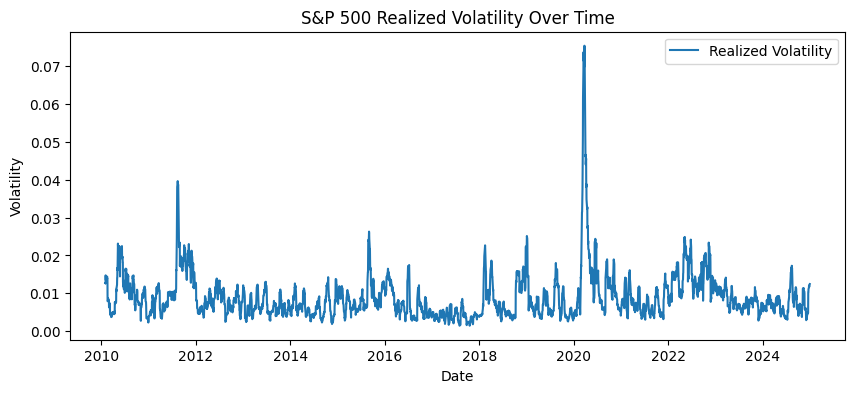

In [8]:
plt.figure(figsize=(10,4))
plt.plot(data.index, data['RealizedVolatility'], label='Realized Volatility')
plt.title('S&P 500 Realized Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


## **Log Returns Analysis**

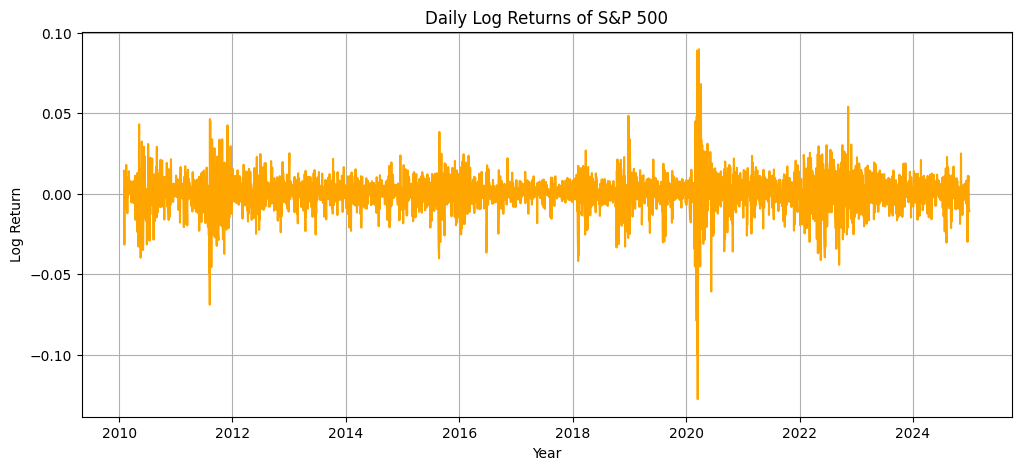

In [9]:
plt.figure(figsize=(12,5))
plt.plot(data.index, data['LogReturn'], color='orange')
plt.title('Daily Log Returns of S&P 500')
plt.xlabel('Year')
plt.ylabel('Log Return')
plt.grid(True)
plt.show()


## **Distribution of Log Returns**

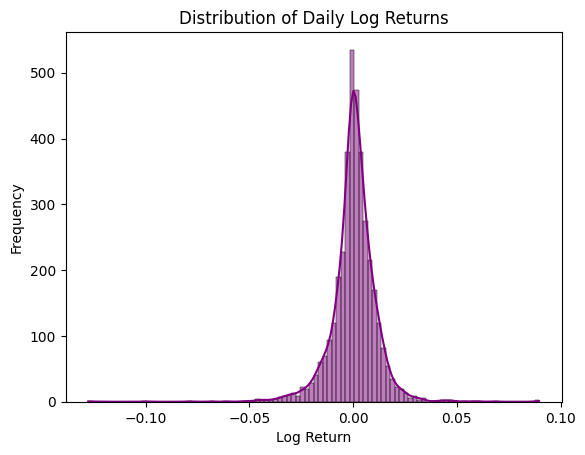

In [10]:
import seaborn as sns

sns.histplot(data['LogReturn'], bins=100, kde=True, color='purple')
plt.title('Distribution of Daily Log Returns')
plt.xlabel('Log Return')
plt.ylabel('Frequency')
plt.show()


## **Volatility (Target Variable) Over Time**

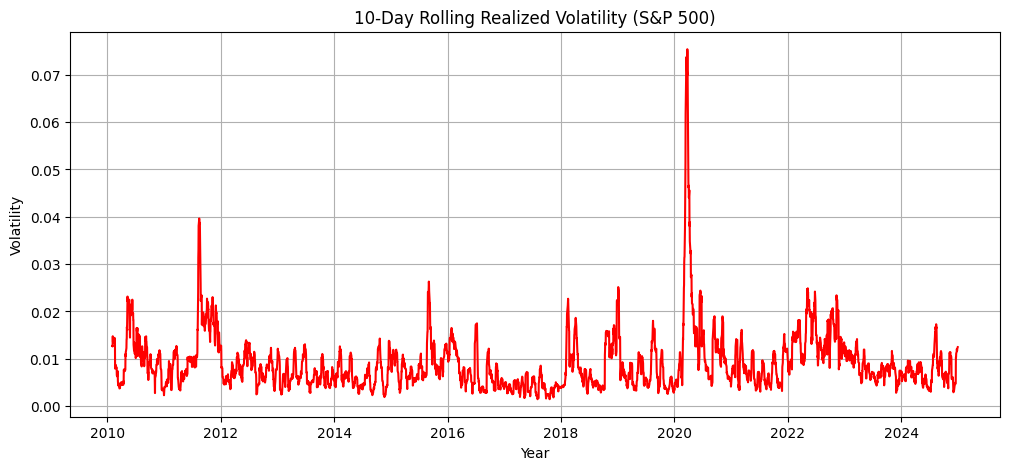

In [11]:
plt.figure(figsize=(12,5))
plt.plot(data.index, data['RealizedVolatility'], color='red')
plt.title('10-Day Rolling Realized Volatility (S&P 500)')
plt.xlabel('Year')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()


## **Price vs. Volatility Relationship**

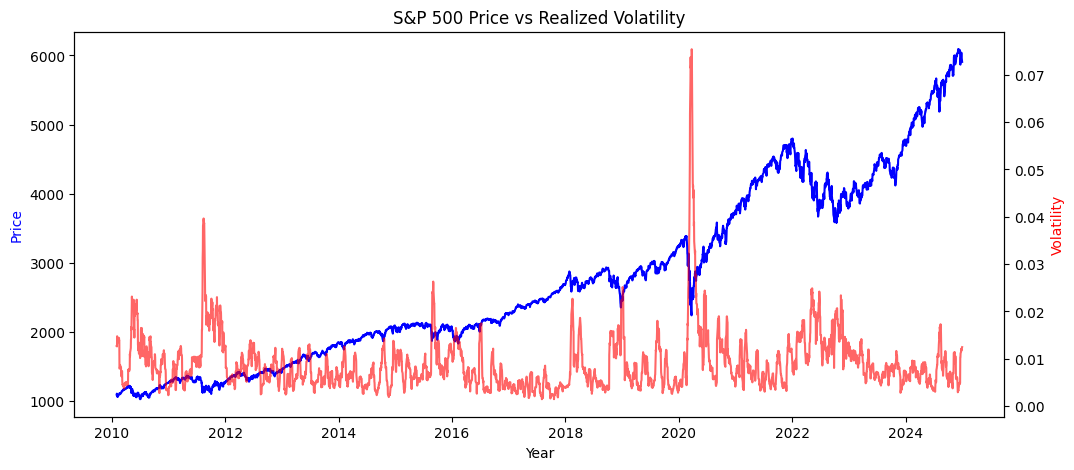

In [12]:
fig, ax1 = plt.subplots(figsize=(12,5))
ax1.plot(data.index, data['Close'], color='blue', label='Close')
ax2 = ax1.twinx()
ax2.plot(data.index, data['RealizedVolatility'], color='red', label='Volatility', alpha=0.6)
ax1.set_xlabel('Year')
ax1.set_ylabel('Price', color='blue')
ax2.set_ylabel('Volatility', color='red')
plt.title('S&P 500 Price vs Realized Volatility')
plt.show()
